<a href="https://colab.research.google.com/github/kavithanjali2019rit/Mental-Health-Monitoring-using-AI-and-ML/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Load the HRV data for training
heart_rate = pd.read_csv('/content/test.csv')

In [ ]:
# Select the HRV features and the target variable
X_train = heart_rate[['MEAN_RR', 'RMSSD', 'SDRR', 'pNN50']]
y_train = heart_rate['condition']

In [ ]:
# Train an SVC classifier on the HRV data
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# Load the metric data for testing
metrics = pd.read_csv('/content/Metrics-_3_.csv')

In [ ]:
# Select the metrics features and the target variable
X_test = metrics[['MEAN_RR', 'RMSSD', 'SDRR', 'pNN50']]
y_test = metrics['Result']

In [ ]:
# Make predictions on the metrics data using the trained model
y_pred = svc_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score:', accuracy)

Accuracy score: 0.23923923923923923


In [ ]:
# Compare the actual and predicted values and save to a CSV file
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('results.csv', index=False)

In [ ]:
# Calculate the accuracy of each prediction
accuracies = y_test == y_pred

# Add a column to the metrics data with the accuracies
metrics['accuracy'] = accuracies

# Save the metrics data with predicted stress levels and accuracies to a new CSV file
metrics.to_csv('metrics_data_with_predictions_and_accuracies.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[216  76  18]
 [289   1  41]
 [238  98  22]]


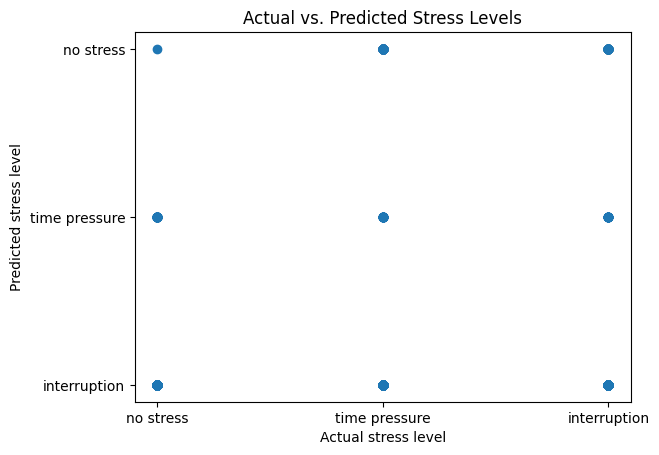

In [ ]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual stress level')
plt.ylabel('Predicted stress level')
plt.title('Actual vs. Predicted Stress Levels')
plt.show()